### (Linear Regression) In this assignment, you will analyze linear regression models on different categories of data about average households in the United States

**Gather and Prepare Data:** You will be using the same dataset (zcta ) in exercise 2.
- Make sure to remove all meanhouseholdincome duplicate rows of data (only females’ records should be in the dataset).
- Remove the columns zcta and sex.
- Remove outliers by creating subsets of the original data so that:
    1. 8 < meaneducation < 18
    2. 10,000 < meanhouseholdincome < 200,000 0 < meanemployment < 3
    3. 20 < meanage < 60
    
- Create a variable called log_income = log10(meanhouseholdincome).
- Rename the columns meanage, meaneducation, and meanemployment as age, education, and employment, respectively.

In [1]:
data = read.csv("zeta.csv")

In [2]:
library(ggplot2)

In [3]:
#Remove all meanhouseholdincome duplicates (only females records should be in the dataset)
data = subset(data, data$sex == 'F')

In [4]:
#Remove the columns zcta and sex
data = subset(data, select = -c(zcta, sex))

In [6]:
#Remove outliers

##8 < meaneducation < 18
data = subset(data, meaneducation <18 & meaneducation >8)

In [7]:
##10,000 < meanhouseholdincome < 200,000
data <- subset(data, meanhouseholdincome <200000 & meanhouseholdincome >10000)

In [8]:
##0 < meanemployment < 3
data <- subset(data, meanemployment <3 & meanemployment >0)

In [9]:
##20 < meanage < 60
data <- subset(data, meanage <60 & meanage >20)

In [10]:
#Rename the columns
names(data)[names(data)=="meanage"] <- "age"
names(data)[names(data)=="meaneducation"] <- "education"
names(data)[names(data)=="meanemployment"] <- "employment"

In [11]:
#Create a variable called log_income = log10(meanhouseholdincome)
data$log_income <- log10(data$meanhouseholdincome)

**Linear Regression Analysis:** You will be analyzing this data with income as the dependent variable and
the other columns as independent variables.

**a.** Create a scatter plot showing the effect age has on log_income and paste it here. Do you see any linear relationship between the two variables?

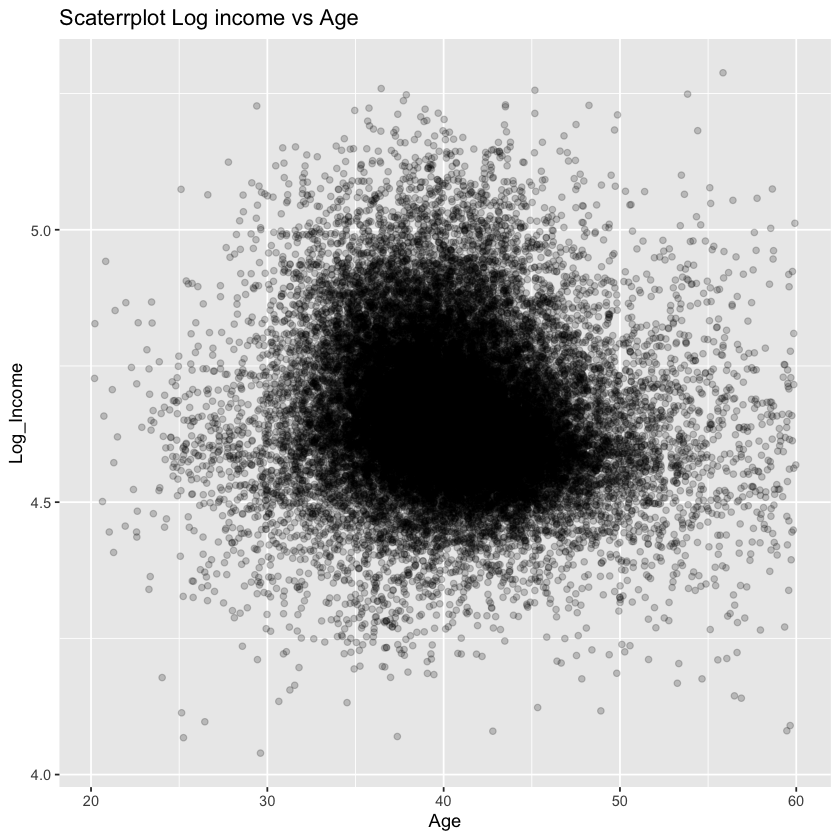

In [12]:
#Create a scatter plot showing the effect age has on log_income and paste it here. 
#Do you see any linear relationship between the two variables? 
ggplot(data,aes(x= age, y=log_income)) +geom_point(alpha=0.2) +labs(x="Age",y="Log_Income",title="Scaterrplot Log income vs Age")

In [13]:
#looking at correlations
cor(data$age, data$log_income)

[1] -0.108803

From the scatter plot we can see (although is much harder to see) that there is a weak inverse linear relationship betweent he 2 vars. In addition the correlation coefficient is -0.108803 between the 2 vars and this indicates a weak inverse relationship between our 2 vars

**b.** Create a linear regression model between log_income and age. What is the interpretation of the t-value? What kind of t-value would indicate a significant coefficient?

In [14]:
#Create a linear regression model between log_income and age. What is the interpretation of the t-value? 
#What kind of t-value would indicate a significant coefficient?
model <- lm(log_income ~ age, data)
print(model)

summary(model)


Call:
lm(formula = log_income ~ age, data = data)

Coefficients:
(Intercept)          age  
   4.787748    -0.003074  




Call:
lm(formula = log_income ~ age, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65733 -0.08296 -0.01620  0.07178  0.67202 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7877484  0.0064657   740.5   <2e-16 ***
age         -0.0030739  0.0001584   -19.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1366 on 31427 degrees of freedom
Multiple R-squared:  0.01184,	Adjusted R-squared:  0.01181 
F-statistic: 376.5 on 1 and 31427 DF,  p-value: < 2.2e-16


The t-val tests whether or not there is a statistically significant relationship between the dependent var and the independent var, that is whether or not the beta coefficient of the independent variable is significantlly different from 0.

In mathematical terms, for a given beta coefficiend (b), the t-test is computed as $t=\frac{b-0}{SE(b)}$, where $SE(B)$ is the standard error of the coefficient b. The t-val measures the number of standard diviations that b is away from 0. The higher the t-val the more significant the independent variable.

In our project, both the t-vals for the age and intercept are highly significant, which means that there is a significant association between age an income.

**c.** What is the interpretation of the R-squared value? What kind of R-squared value would indicate a good fit?

The R-squared val is a measure of fitness for our model. The R-squred ranges from 0 to 1 (e.g.: a number that is near 0 represents a regressio that does not explain the variance in the independent variable well enough and a number closed to 1 means that a high percentange of the observed variance in the independent variable is explained.

$$R^2=1-\frac{SSE}{SST}$$

Where, SSE is the sum of the squared errors given by $SSE=\sum_{i}^{n}(y_i - \hat{y_i})$ and $SST=\sum_{i}^{n}(y_i - \bar{y_i})^2$ is the sum of squared total. Here $\hat{y_i}$ is the fitted val for the observation and $\bar{y}$ is the mean of Y.

A high value of R-squarred is a good indication. In our project, the R-squared we obtained was 0.01182 or roughly 1.2% of the variance found in the dependent variable (income) can be explained by the independent var (age)

**d.** What is the interpretation of the F-statistic? What kind of F-statistic indicates a strong linear regression model?

F-statistics is a good indicator of whther there is a relationship between our independent and dependent vars. The greater the F-statistic is than 1 the better it is. However, how much larger the F-stat needs to be depends on both the number of data samples and the number of model parameters.

The math formula for F statistic in a regression problem is:

$$F=\frac{\frac{RSS}{p-1}}{\frac{SSE}{n-p}}$$

Where $RSS$ is the residual sum of squares of the model and $SSE$ is the sum of squared errors

The F-statistic is used to determine if the model is actually doing better than just guessing the mean val of y as the prediction ("the null mode"). If the lienar model is really just estimating the same as the null model, then the F-statistic should be about 1. A F-statistic that is much larger than 1 indicates a strong linear regression model.

**e.** View a detailed summary of the previous model. What is the R-squared value? Does this suggest that the model is a good fit? Why? 

In [15]:
summary(model)


Call:
lm(formula = log_income ~ age, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65733 -0.08296 -0.01620  0.07178  0.67202 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7877484  0.0064657   740.5   <2e-16 ***
age         -0.0030739  0.0001584   -19.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1366 on 31427 degrees of freedom
Multiple R-squared:  0.01184,	Adjusted R-squared:  0.01181 
F-statistic: 376.5 on 1 and 31427 DF,  p-value: < 2.2e-16


Our R-squared value is very far from 1 and closed to 0 which suggests that the model is not a good fit

**f.** Create a scatter plot showing the effect education has on log_income. Do you see any linear relationship between the two variables?

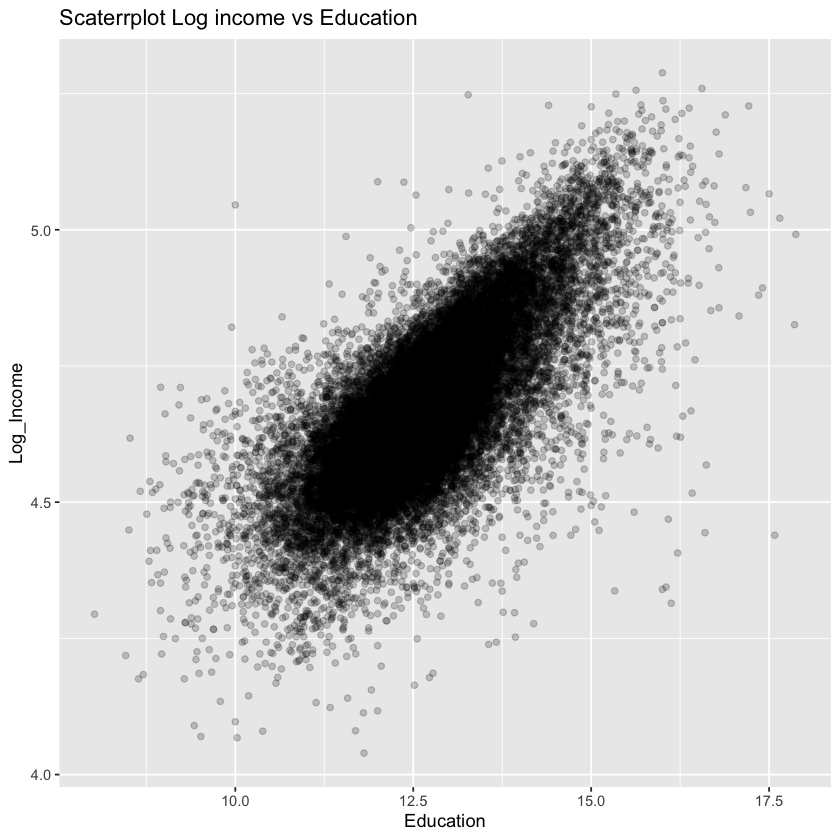

In [17]:
#Create a scatter plot showing the effect education has on log_income. 
#Do you see any linear relationship between the two variables? 
ggplot(data,aes(x= education, y=log_income)) +geom_point(alpha=0.2) +labs(x="Education",y="Log_Income",title="Scaterrplot Log income vs Education")

The scatter plot shows that there is a linear relationship between these 2 vars and it's a positive linear relationship

**g.** Analyze a detailed summary of a linear regression model between log_income and education. What is the R-squared value? Is the model a good fit? Is it better than the previous model?

In [18]:
#Analyze a detailed summary of a linear regression model between log_income and education. 
#What is the R-squared value? Is the model a good fit? Is it better than the previous model? 
model2 <- lm(log_income ~ education, data)
summary(model2)


Call:
lm(formula = log_income ~ education, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72721 -0.05349  0.00029  0.05796  0.64512 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.3896705  0.0067123   505.0   <2e-16 ***
education   0.1010797  0.0005311   190.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09369 on 31427 degrees of freedom
Multiple R-squared:  0.5354,	Adjusted R-squared:  0.5354 
F-statistic: 3.622e+04 on 1 and 31427 DF,  p-value: < 2.2e-16


- Multiple R-squared: 0.5354
- Adjusted R-squared: 0.5354

This R-squared value is much better than in our first model, it is much closer to one and thus suggesting that it is a decent fit. Certainly much better than our previous model.

**h.** Analyze a detailed summary of a linear regression model between the dependent variable log_income, and the independent variables age, education, and employment. Is this model a good fit? Why? What conclusions can be made about the different independent variables?

In [19]:
#Analyze a detailed summary of a linear regression model between the dependent variable log_income, 
#and the independent variables age, education, and employment. Is this model a good fit? Why? 
#What conclusions can be made about the different independent variables? 
model3 <- lm(log_income ~ education + age + employment, data)
summary(model3)


Call:
lm(formula = log_income ~ education + age + employment, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70315 -0.05023  0.00066  0.05213  0.64021 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.5123331  0.0076320  460.21   <2e-16 ***
education    0.0912653  0.0005980  152.61   <2e-16 ***
age         -0.0026030  0.0001109  -23.48   <2e-16 ***
employment   0.0663722  0.0019559   33.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09017 on 31425 degrees of freedom
Multiple R-squared:  0.5697,	Adjusted R-squared:  0.5697 
F-statistic: 1.387e+04 on 3 and 31425 DF,  p-value: < 2.2e-16


Based on the values of the R-squared this model appears to be the best, not perfect, but better than the previous 2 models. Also, the F-statistics is much larger than 1 and our p-val is very small which indicates a strong model.

The independent var age seems to have the weakest linear relationship because its coefficient and t-val are small

**i.** Based on the coefficients of the multiple regression model, by what percentage would income increase/decrease for every unit of education completed, while all other independent variables remained constant?

For every unit of education completed, income would increase by 9.13%

**j.** Create a graph that contains a y = x line and uses the multiple regression model to plot the predicted data points against the actual data points of the training set.

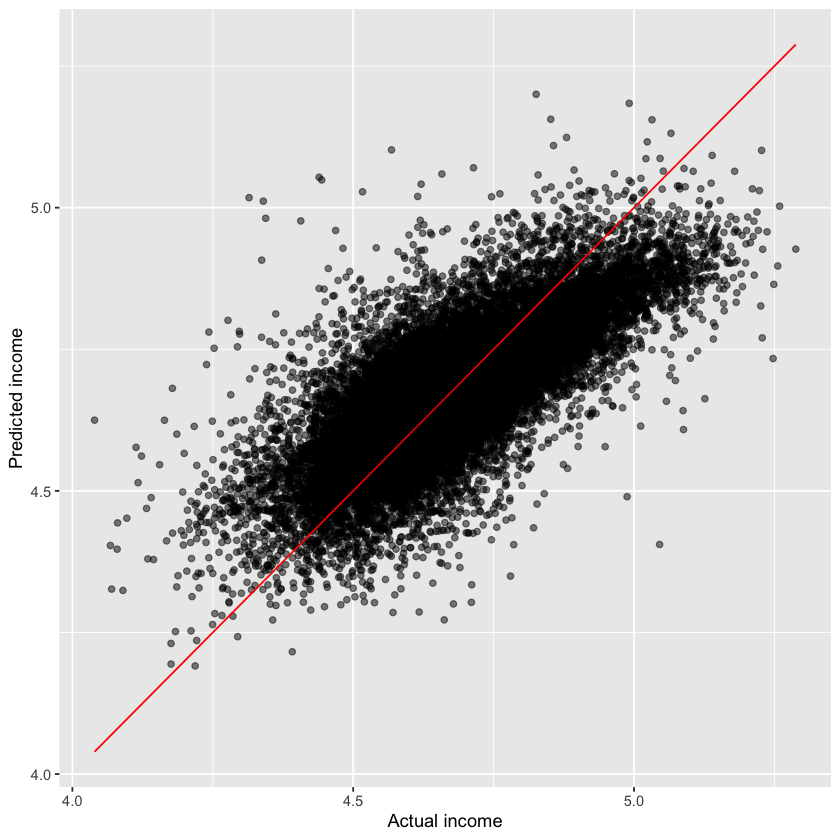

In [20]:
#Create a graph that contains a y = x line and uses the multiple regression model to plot the 
#predicted data points against the actual data points of the training set.
a <- geom_point(aes(x= data$log_income, y=fitted(model3)), alpha=0.5)
b <- geom_line(aes(x=data$log_income, y= data$log_income), col = 'red')
c <- labs(x="Actual income", y="Predicted income")
ggplot() + a + b + c

**k.** How well does the model predict across the various income ranges?

From the graph we can see two things:

- For higher incomes our model underpredicts slightly
- For lower incomes our model overshoots a bit and over predicts

Overall the graph indicates that the model can do reliable predictions around the median income range